# IPython Import and Processing of SFG Spectra

Locate the directory where your Python files are stored.

In [3]:
import sys
sys.path.append('/Users/geiger/Box Sync/Science/Experimental/Software/SFGprocessing/Python')

Set directory to write files too:

In [4]:
outputPath = '/Users/geiger/Box Sync/Science/Data/SFG/Solstice/2017/10162017'

### 1. PS Calibration

Locate the polystyrene calibration file by adjusting the path below. Upon execution, the polystyrene calibration file will be plotted:

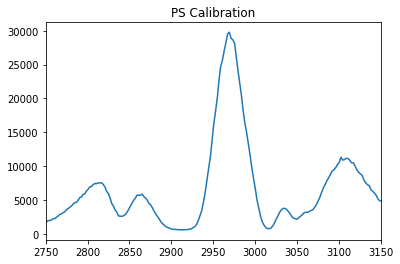

In [6]:
#locate ps calibration file here
psCalibFile = '/Users/geiger/Box Sync/Science/Data/SFG/Solstice/2017/10162017/goldenduse/ps_3400.spe'

#import
from pscalib import PScalib
ps = PScalib(psCalibFile)

#plot pscalibration
ps.plot()

**Fit the first peak centered around 2850 wavenumbers:**

Peak shift from peak 0 is -8.96


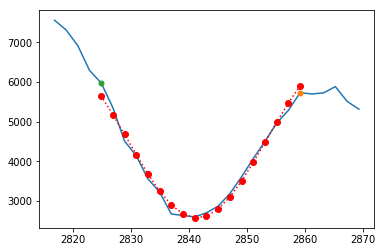

In [7]:
#starting and ending values of segment to fit
val1 = 2825
val2 = 2860

#fit it with gaussian, calculate shift
ps.fitPeak(val1,val2,0)

**Fit the second peak centered around 3060 wavenumbers:**

Peak shift from peak 1 is -11.16


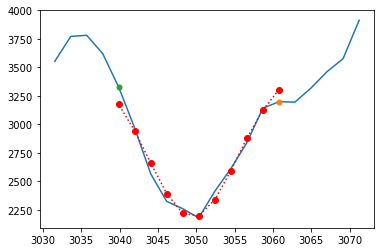

In [8]:
#starting and ending values of segment to fit
val1 = 3040
val2 = 3060

#fit it with gaussian, calculate shift
ps.fitPeak(val1,val2,1)

 **Evaluate total shift as average of the two shifts:**

In [9]:
calib = ps.evaluateShift()

Average shift is  -10.06


### 2. Import Gold Reference Spectrum

**Input individual gold spectra:**

Importing DFGs and BGs...
Has dfgs:
2800
2900
3000
3100
3200
3300
3400
3500
Has bgs:
2800_bg
2900_bg
3000_bg
3100_bg
3400_bg
3500_bg
Subtracting BGs from DFGs...
For dfg 2800 found 2800_bg
For dfg 2900 found 2900_bg
For dfg 3000 found 3000_bg
For dfg 3100 found 3100_bg
For dfg 3200 found 3400_bg
For dfg 3300 found 3400_bg
For dfg 3400 found 3400_bg
For dfg 3500 found 3500_bg


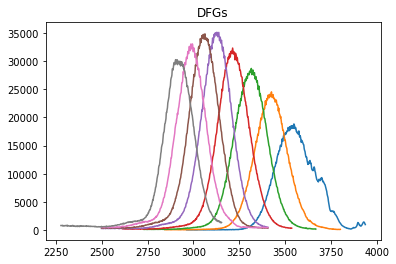

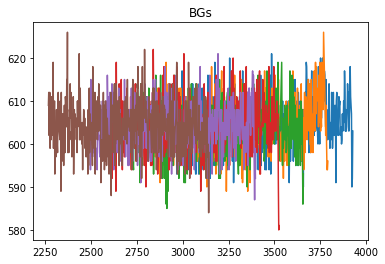

In [10]:
#folder where the gold data is stored
inputgold = '/Users/geiger/Box Sync/Science/Data/SFG/Solstice/2017/10162017/goldenduse'

from spectrum import Spectrum
import os

#create object, loads each sample and background DFG
gold = Spectrum(inputgold,shift = calib)

#subtract the appropriate background DFG from each sample DFG
gold.subtractBGs()

#plot the imported sample DFGs
gold.plotDFGs()

#plot the imported background DFGs
gold.plotBGs()

**Align individual DFG spectra along wavenumber axis:**

Padding DFGs with Zeros...
Smoothing DFGs...


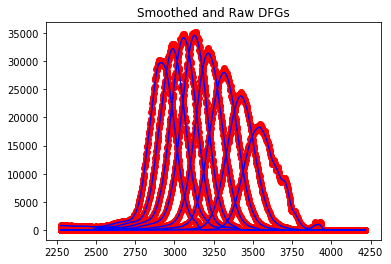

In [11]:
#pad the dfgs with zeros so they align and can be summed up
gold.padDFGs()

#smooth the DFGs with a gaussian filter
gold.smoothDFGs(5)

#plot the smoothed and raw DFGs
gold.plotSmoothRawDFGs()

**Truncate each spectrum where IR power dies off:**

Finding truncation thresholds at 0.05 ...
Truncating DFGs...


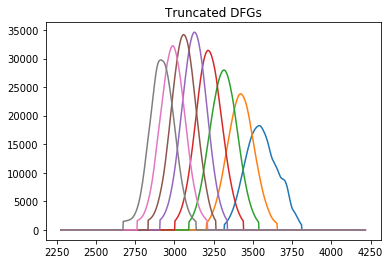

In [12]:
#threshold for truncation
trunc = 0.05

#find the indices of where the reference signal falls off to guide truncation
gold.findTruncateIndices(trunc)

#truncate 
gold.truncateFullDFGs(gold)

#plot the truncated DFGs
gold.plotTruncatedDFGs()

**Sum the truncated spectra:**

Summing truncated DFGs...


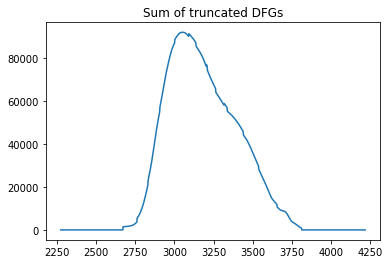

In [13]:
#sum the truncated DFGs
gold.sumTruncatedDFGs()

#plot the summed, truncated DFGS
gold.plotSumTruncatedDFG()

**Export Gold Data to File:**

In [14]:
#write final summed, smoothed, padded, truncated spectrum to file
name = 'goldSummedTruncated.txt'

os.chdir(outputPath)
gold.writeSumTruncatedDFG(name)

Truncated, summed wave written to goldSummedTruncated.txt


### 3. Load Sample Spectra

Importing DFGs and BGs...
Has dfgs:
2800
2900
3000
3100
3200
3300
3400
3500
Has bgs:
2800_bg
2900_bg
3000_bg
3100_bg
3400_bg
3500_bg
Removing cosmic rays from spectra...
No spikes found in 2800
No spikes found in 2900
No spikes found in 3000
No spikes found in 3100
No spikes found in 3200
No spikes found in 3300
No spikes found in 3400
No spikes found in 3500
No spikes found in 2800_bg
No spikes found in 2900_bg
No spikes found in 3000_bg
No spikes found in 3100_bg
No spikes found in 3400_bg
No spikes found in 3500_bg
Subtracting BGs from DFGs...
For dfg 2800 found 2800_bg
For dfg 2900 found 2900_bg
For dfg 3000 found 3000_bg
For dfg 3100 found 3100_bg
For dfg 3200 found 3400_bg
For dfg 3300 found 3400_bg
For dfg 3400 found 3400_bg
For dfg 3500 found 3500_bg
Padding DFGs with Zeros...
Summing full DFGs...
Truncating DFGs...
Summing truncated DFGs...
Truncated, summed wave written to lowsalt1.txt


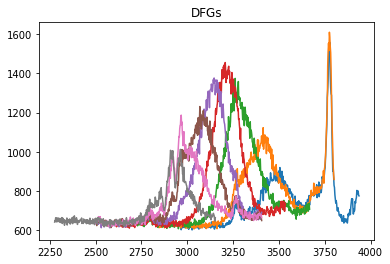

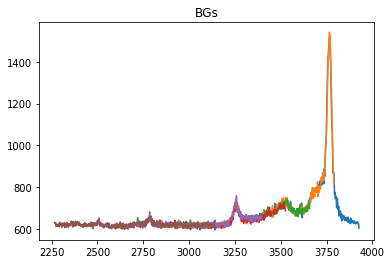

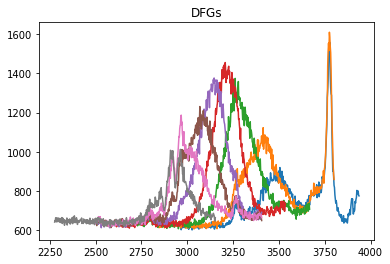

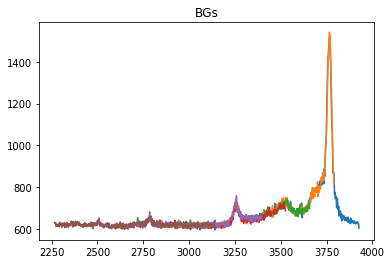

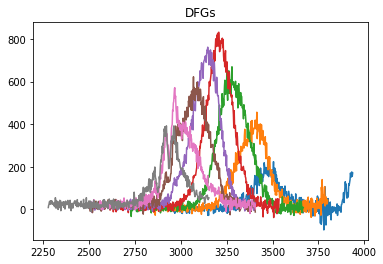

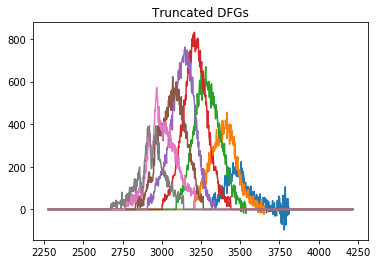

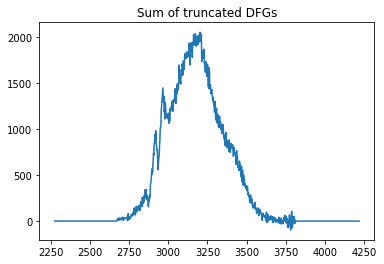

In [15]:
#folder where files are stored
samplepath = '/Users/geiger/Box Sync/Science/Data/SFG/Solstice/2017/10162017/lowsalt/run1'
#name
name = 'lowsalt1.txt'

cosmicrayThreshold = 100

spec = Spectrum(samplepath,shift=calib)

#plot after cosmic ray removal
spec.plotDFGs()
spec.plotBGs()

#remove cosmic rays
spec.removeCRs(cosmicrayThreshold)

#plot after cosmic ray removal
spec.plotDFGs()
spec.plotBGs()

#subtract background
spec.subtractBGs()

#plot after background subtraction
spec.plotDFGs()

#pad the dfgs with zeros so they align and can be summed up
spec.padDFGs()

#sum the padded DFGs
spec.sumFullDFGs()

#truncate the DFGs according to the gold reference spectrum
spec.truncateFullDFGs(gold)

#plot the truncated DFGs
spec.plotTruncatedDFGs()

#summ the truncated DFGs
spec.sumTruncatedDFGs()

#plot the summed, truncated spectrum
spec.plotSumTruncatedDFG()

#write the summed, truncated spectrum to file
spec.writeSumTruncatedDFG(name)